In [1]:
#required imports for the demo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Required dependencies
 - Before using the EphysToolkit module, you first need to make sure you have the following dependencies installed:
 
     - numpy
     - scipy
     - pandas
     - json

## "Installing" the module
 - First, download the EphysToolkit.py file to any folder.
 - Then, define a variable pointing to the directory where you placed the file.

In [2]:
#you can change this variable to point to your directory instead
EphysToolkit_path = "/media/sf_DebianShared/custom_modules"

- Copy and run the following lines of code to append the directory to your system path:

In [3]:
import sys
sys.path.append(EphysToolkit_path)

- Finally, run these import statements:

In [4]:
from EphysToolkit import ephys_toolkit
from EphysToolkit import load_experiment

## Loading an experiment

 - The following section describes how to load your data using the load_experiment class.
 - First, define some variables pointing to your file paths.
 - Use absolute paths.
 - Spike times are located in a file that ends with 'firings.mat'.
 - Stimulus data are located in a file that ends with 'stimulusData.mat'.

In [5]:
#you can change these variables to point to your file paths instead
spike_file = '/media/sf_DebianShared/Project_data/AE_M001/AE_M001_Section_1/AE_M001_Section_1_BLK1/AE_M001_Section_1_BLK1_firings.mat'
stim_file =  '/media/sf_DebianShared/Project_data/AE_M001/AE_M001_Section_1/AE_M001_Section_1_BLK1/AE_M001_Section_1_BLK1_stimulusData.mat'

In [6]:
experiment = load_experiment(spike_file, stim_file)

## Checking the stimulus data
 - Stimulus information is retrieved by calling the stim_data attribute
 - Stimulus data is stored in a pandas dataframe because all arrays have the same length.

In [7]:
experiment.stim_data

,stim_condition_ids,stim_start_indicies,stim_stop_indicies,stim_start_times,stim_stop_times
0,1,40906,51509,2045.30,2575.45
1,2,51837,62501,2591.85,3125.05
2,1,62838,73504,3141.90,3675.20
3,2,73841,84504,3692.05,4225.20
4,1,84899,95497,4244.95,4774.85
...,...,...,...,...,...
393,2,4337436,4347770,216871.80,217388.50
394,1,4348105,4358769,217405.25,217938.45
395,2,4359104,4369763,217955.20,218488.15
396,1,4370099,4380762,218504.95,219038.10


## Checking the spiking data
 - Cluster spiking information is retrieved by calling the spike_data attribute.
 - Spiking data is stored as a list of dictionaries.
 - Each dictionary corresponds to a different cluster.
 - The dictionary keys are:
     - 'cluster_id': a number corresponding to the unique id of the cluster
     - 'channel_id': a number corresponding to the channel that picked up the cluster
     - 'spike_index': index of spikes relative to the length of the entire recording
     - 'spike_time': time that a spike occured in unix time
     - 'rel_spike_time': time of the spike in ms relative to the start of the recording

In [8]:
#checking the first 10 relative spike times of just the first cluster

experiment.spike_data[0]['rel_spike_time'][:10] 

array([ 726.2 ,  917.05, 1111.2 , 1122.6 , 2351.6 , 2508.  , 2771.15,
       2823.35, 2959.15, 4369.95])

## Changing the units of your event times
 - This section describes how to change the time unit for your event times using the get_event_times method.
 - By default, EphysToolkit gives you your event times (stim start, stim stop, rel spike time) in milliseconds. It should not be necessary to change the unit of your event times, but it is possible.
 - You should always give your units in terms of 1 second, ie:
     - 1ms = 0.001
     - 1cs = 0.01
     - 1ds = 0.1
     - 1s  = 1
 - It is also possible to define any arbitrary unit as long as it is relative to 1 second.

In [9]:
experiment.get_event_times(bin_size = 0.001) #event times in milliseconds
experiment.get_event_times(bin_size = 0.01) #event times in centiseconds
experiment.get_event_times(bin_size = 0.1) #event times in deciseconds
experiment.get_event_times(bin_size = 1) #event times in seconds

 - Checking the changes...

In [10]:
#The last line of code changed the unit to seconds, so event times are given in seconds
experiment.stim_data

,stim_condition_ids,stim_start_indicies,stim_stop_indicies,stim_start_times,stim_stop_times
0,1,40906,51509,2.04530,2.57545
1,2,51837,62501,2.59185,3.12505
2,1,62838,73504,3.14190,3.67520
3,2,73841,84504,3.69205,4.22520
4,1,84899,95497,4.24495,4.77485
...,...,...,...,...,...
393,2,4337436,4347770,216.87180,217.38850
394,1,4348105,4358769,217.40525,217.93845
395,2,4359104,4369763,217.95520,218.48815
396,1,4370099,4380762,218.50495,219.03810


In [11]:
experiment.spike_data[0]['rel_spike_time'][:10]

array([0.7262 , 0.91705, 1.1112 , 1.1226 , 2.3516 , 2.508  , 2.77115,
       2.82335, 2.95915, 4.36995])

 - As stated previously, it is possible to define any arbitrary unit as long as it is relative to 1 second.
 - Let's try defining a 1 quarter second unit

In [12]:
experiment.get_event_times(bin_size = 0.25) #event times in quarter seconds
experiment.spike_data[0]['rel_spike_time'][:10]

array([ 2.9048,  3.6682,  4.4448,  4.4904,  9.4064, 10.032 , 11.0846,
       11.2934, 11.8366, 17.4798])

In [13]:
#resetting the units to 1ms
experiment.get_event_times(bin_size = 0.001)

## Checking the spike sorting metrics
 - This section describes how to retrieve your spike sorting metrics using the get_spike_sorting_metrics method.
 - First, define a variable pointing to the path of your spike sorting metrics file.
 - The metrics file typically ends with 'metrics_isolation.json'.


In [14]:
#you can change this variable to point to your file path instead
metrics_file = '/media/sf_DebianShared/Project_data/AE_M001/AE_M001_Section_1/AE_M001_Section_1_metrics_isolation.json'

In [15]:
metrics = experiment.get_spike_sorting_metrics(metrics_file)
metrics

,cluster,isolation,noise_overlap
0,1.0,0.997650,0.240012
1,2.0,0.997487,0.007540
2,3.0,0.910693,0.205053
3,4.0,0.878966,0.188308
4,5.0,0.898355,0.206228
...,...,...,...
452,453.0,0.908343,0.133666
453,454.0,0.903349,0.178613
454,455.0,0.890717,0.172738
455,456.0,0.905993,0.172150


(0.0, 0.5)

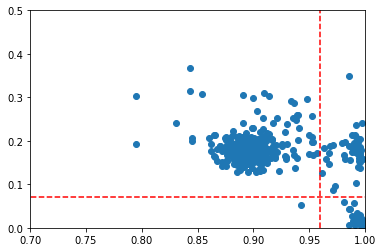

In [16]:
#plot isolation x noise overlap
plt.scatter(metrics['isolation'], metrics['noise_overlap'])
plt.plot(np.linspace(0,1,457),[0.07]*457, linestyle = '--', color = 'red')
plt.plot([0.96]*457, np.linspace(0,1,457), linestyle = '--', color = 'red')
plt.xlim(0.7,1)
plt.ylim(0,0.5)

- Below demonstrates how to make a list of units that pass the single unit criteria (isolation > 0.96, noise overlap < 0.07):

In [17]:
single_units = metrics.loc[ #using the loc method from the pandas module...
    
    #search for rows where isolation is above 0.96 and noise overlap is below 0.07
    (metrics.isolation > 0.96) 
    & (metrics.noise_overlap < 0.07)
].reset_index()

In [18]:
#index into the 'index' column of the dataframe
#call the values method from the pandas module to convert the series object into an array
include_units = single_units['index'].values

In [19]:
include_units

array([  1,  29,  30,  34,  35,  36,  38,  39,  40,  47,  48,  52,  87,
        89,  90,  91,  92, 112, 119, 120, 122, 127, 128, 151, 156, 166,
       198, 200, 234, 262, 263, 264])

## Making raster arrays and raster plots
 - This section describes how to make raster arrays using the make_raster method.
 - First, define an array of stim start times and an array of spike times.

In [20]:
spiketimes = experiment.spike_data[40]['rel_spike_time']
stimtimes = experiment.stim_data['stim_start_times'].values

- By default, the make_raster method concatenates/sums all spikes across each stimulus repetition.

In [21]:
raster = experiment.make_raster(
    stimtimes, #first argument is the stimtimes
    spiketimes, #second argument is the spiketimes
    thresh = (-500,500) #third argument "thresh" defines the time boundaries around 0 as the stimulus onset
)

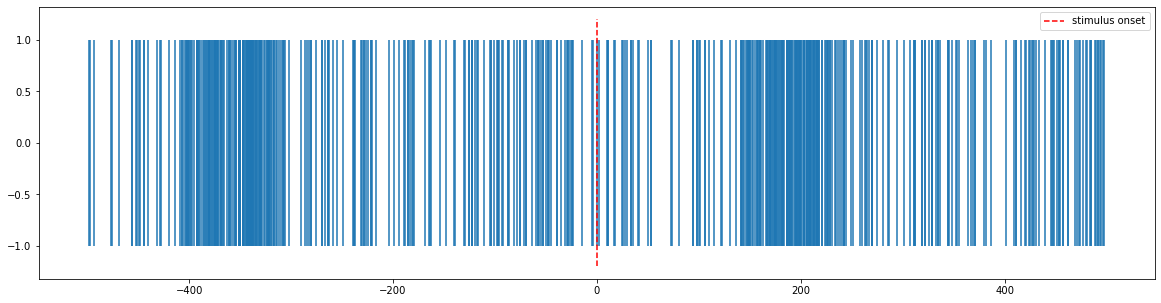

In [22]:
#plot your raster
plt.subplots(figsize = (20,5))
plt.vlines(raster, -1, 1)
plt.vlines(0,-1.2,1.2, linestyle = '--', color = 'red', label = "stimulus onset")
plt.legend()

- You can also make an individual raster array for each individual stimulus repetition by setting the "concatenate" argument equal to "False".

In [23]:
raster = experiment.make_raster(
    stimtimes,
    spiketimes,
    thresh = (-500,500),
    concatenate = False #make an individual raster for each stimulus rep
)

In [24]:
raster[0:5] #the raster array for each of the first 5 stimulus repetitions

[[114.54999999999995],
 [-432.0, 154.70000000000027, 439.5500000000002],
 [-395.3499999999999, -110.5],
 [],
 []]

In [25]:
print(f"This experiment repeated the stimulus {len(raster)} times") 

This experiment repeated the stimulus 398 times


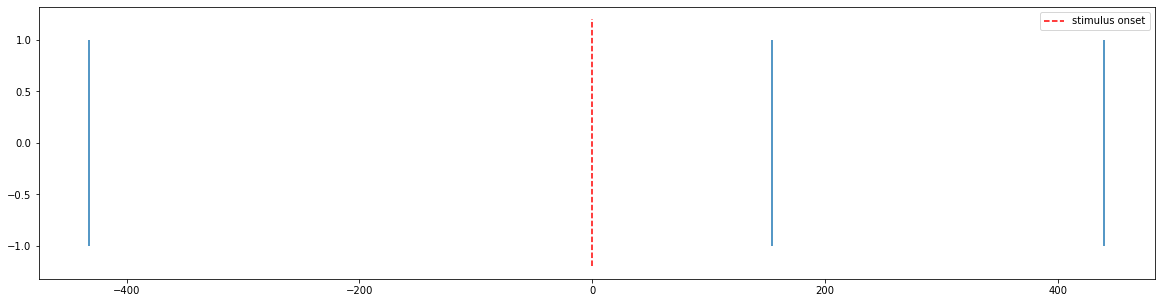

In [26]:
#a raster plot of the response to only the second repetition of the same stimulus

plt.subplots(figsize = (20,5))
plt.vlines(raster[1], -1, 1)
plt.vlines(0,-1.2,1.2, linestyle = '--', color = 'red', label = "stimulus onset")
plt.legend()

## Getting events associated with a particular stimulus condition
- The following section will describe how to get the event times associated with a particular stimulus condition using the get_condition_times method.
- In the previous example where I showed how to make a raster plot, the raster was made relative to all stimulus condition start times. 
- If you want to make a raster plot relative to a specific stimulus condition, you can use the start times associated with just that condition in the make_raster method.
- Let's demonstrate how to get those start times using get_condition_times.
- First, you must choose a condition whose times you want to retrieve. 
- You can browse all the condition identifiers associated with your experiment using the stim_conditions method.

In [27]:
experiment.stim_conditions

array([1, 2], dtype=uint8)

- Since this experiment used only a polarity switching checkerboard stimulus, the only conditions are 1 and 2.

In [28]:
condition_1_events = experiment.get_condition_times(1)
condition_1_events

{'start': array([  2045.3 ,   3141.9 ,   4244.95,   5341.9 ,   6441.85,   7541.8 ,
          8641.8 ,   9741.75,  10841.6 ,  11941.75,  13041.45,  14141.55,
         15241.7 ,  16341.7 ,  17441.65,  18541.65,  19641.45,  20724.95,
         21824.85,  22924.75,  24024.85,  25124.8 ,  26224.7 ,  27324.6 ,
         28424.95,  29508.35,  30591.6 ,  31691.4 ,  32791.5 ,  33891.35,
         34974.7 ,  36074.8 ,  37174.75,  38274.8 ,  39358.1 ,  40457.85,
         41557.7 ,  42641.3 ,  43724.75,  44824.35,  45924.35,  47008.  ,
         48091.2 ,  49190.95,  50274.6 ,  51374.55,  52474.3 ,  53557.9 ,
         54657.85,  55757.85,  56857.85,  57957.8 ,  59057.4 ,  60141.1 ,
         61241.  ,  62340.7 ,  63424.45,  64524.35,  65624.  ,  66724.3 ,
         67824.  ,  68907.45,  70007.2 ,  71090.9 ,  72173.85,  73257.5 ,
         74357.5 ,  75457.1 ,  76540.8 ,  77640.45,  78740.4 ,  79824.05,
         80923.8 ,  82007.  ,  83107.2 ,  84207.35,  85307.35,  86390.65,
         87490.35,  88573.55,

- You can now get the event times associated with condition 1 by indexing the dictionary that is returned.

In [29]:
stimtimes = condition_1_events['start']

In [30]:
raster = experiment.make_raster(
    stimtimes,
    spiketimes,
    thresh = (0,500),
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


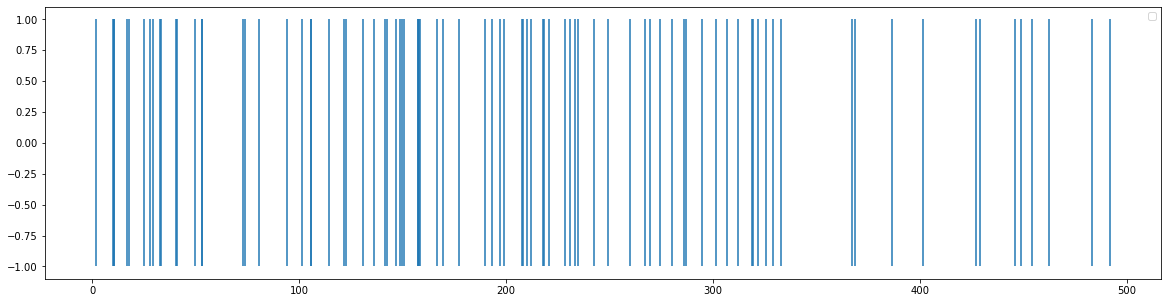

In [31]:
#a raster plot of the response to stimulus condition 1

plt.subplots(figsize = (20,5))
plt.vlines(raster, -1, 1)
plt.legend()

## Making population response matricies and heatmaps
 - The following section will describe how to make a population response matrix using the get_population_response_matrix method.
 - In order to assure that we only analyze single units, the get_population_response_matrix method must take a list of units to include while compiling the matrix.
 - Let's use the "include_units" list we made in the spike sorting metrics section.

In [32]:
include_units

array([  1,  29,  30,  34,  35,  36,  38,  39,  40,  47,  48,  52,  87,
        89,  90,  91,  92, 112, 119, 120, 122, 127, 128, 151, 156, 166,
       198, 200, 234, 262, 263, 264])

- The second thing that needs to be defined by the user is the stimulus condition(s) to include in the population response matrix.
- The previous section showed how to use the stim_conditions attribute to browse your stimulus conditions. So let's pick any one of those conditions.

In [33]:
experiment.stim_conditions

array([1, 2], dtype=uint8)

In [34]:
m = experiment.get_population_response_matrix(
    include_units, #units to include
    1, #the stimulus condition
    thresh = (0,500) #time boundary around the stimulus onsets
)
m

,2,30,31,35,36,37,39,40,41,48,...,129,152,157,167,199,201,235,263,264,265
0,0,0,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0.0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0.0,0,0,0
2,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0.0,0,0,0
3,0,1,0,0,0,3,0,1,0,0,...,0,0,1,0,0,0,0.0,0,0,0
4,0,1,0,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,0,0,0,0,0,1,0,0,...,0,0,4,0,0,0,0.0,0,0,0
496,0,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,1,0,1
497,0,1,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0.0,0,0,0
498,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.0,0,0,0


- The output is a dataframe where each column is a raster array of the given unit responding to the given stimulus condition (concatenated across repeats).
- Using this dataframe, you can plot multiple rasters in a single neat looking figure.

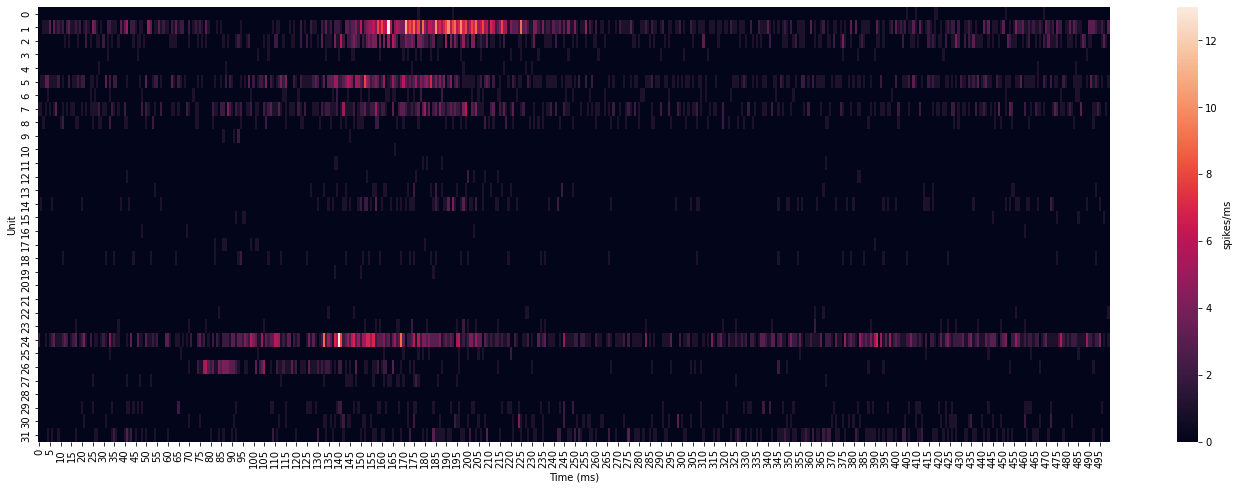

In [35]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms'})
ax.set_xticklabels(np.arange(0,500,5))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- It is also possible to do this with all available stimulus conditions by switching the second argument to 'all'.

In [36]:
m = experiment.get_population_response_matrix(
    include_units, 
    'all', #include all stimulus conditions
    thresh = (0,500) 
)
m

,stimulus_condition,2,30,31,35,36,37,39,40,41,...,129,152,157,167,199,201,235,263,264,265
0,1,0,0,0,0,0,0,0,1,0,...,0,0,2,0,0,0,0.0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0.0,0,0,0
2,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0.0,0,0,0
3,1,0,1,0,0,0,3,0,1,0,...,0,0,1,0,0,0,0.0,0,0,0
4,1,0,1,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,3,2,0,0,3,1,0,1,...,0,0,1,0,0,0,0.0,0,0,0
996,2,0,1,0,0,0,1,0,1,0,...,0,0,5,0,0,0,0.0,0,0,0
997,2,0,1,2,0,0,2,0,0,2,...,0,0,4,0,0,0,0.0,1,0,0
998,2,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0.0,0,0,0


- The output is similar to what was shown previously. However, now there is also a column indicating the stimulus condition.

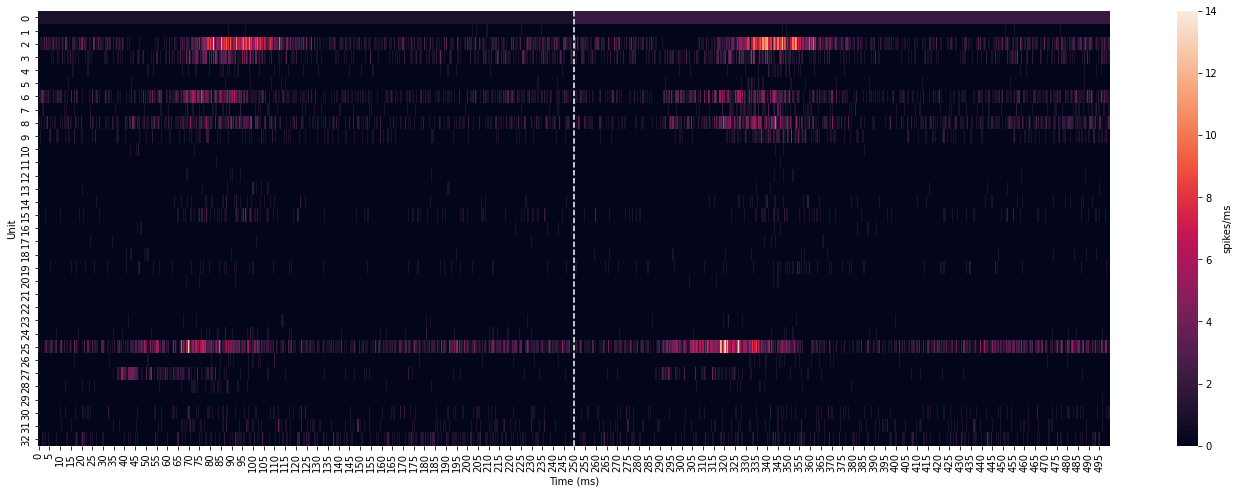

In [37]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms'})

#white dotted line showing the boundary between stimulus conditions
ax.plot([500]*1000, np.arange(1000), linestyle = '--', color = 'white')
ax.set_xticklabels(np.arange(0,500,5))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- This figure looks OK, but some of those unit's responses look pretty dim compared to the other higher frequency units.
- In order to make those faint responses pop out more, we can normalize the population response matrix within each unit.
- To do this, include the 'norm' argument when calling the get_population_response_matrix method.
    - You can set norm = any of the following: 'minmax', 'zscore', 'average'

In [38]:
m = experiment.get_population_response_matrix(
    include_units, 
    'all',
    thresh = (0,500),
    norm = 'minmax' #apply min/max normalization within each unit
)

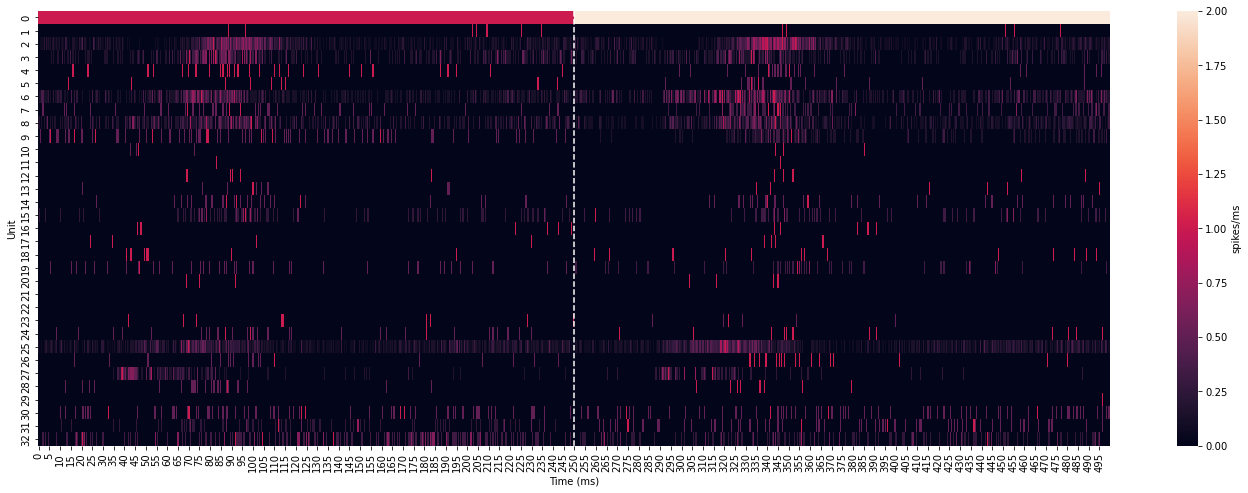

In [39]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms'})

#white dotted line showing the boundary between stimulus conditions
ax.plot([500]*1000, np.arange(1000), linestyle = '--', color = 'white')
ax.set_xticklabels(np.arange(0,500,5))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- Min/max normalization transforms each array such that the values are bounded between 0 and 1.

In [40]:
m = experiment.get_population_response_matrix(
    include_units, 
    'all',
    thresh = (0,500),
    norm = 'zscore' #apply zscore normalization within each unit
)

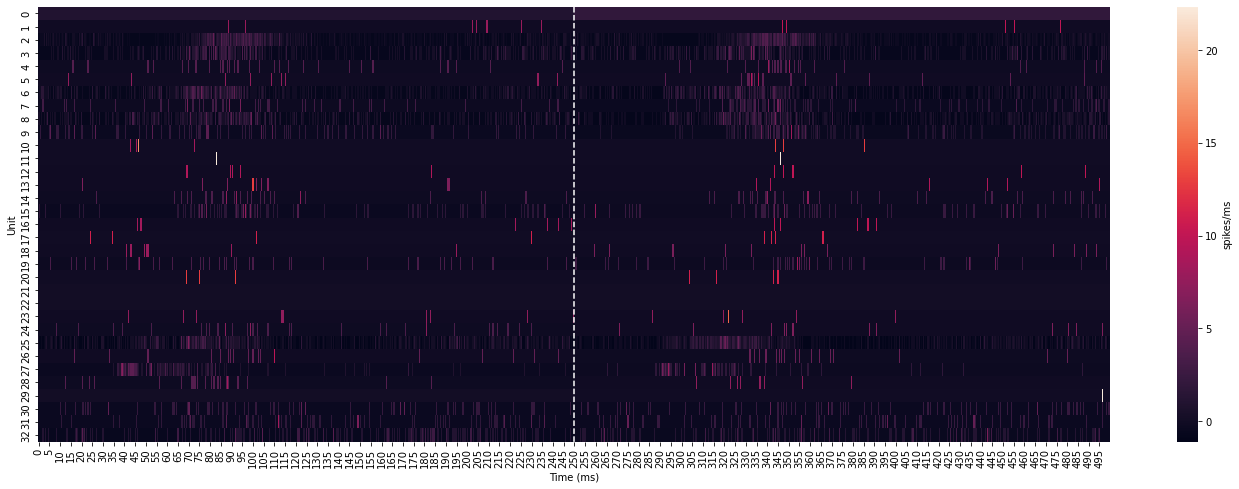

In [41]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms'})

#white dotted line showing the boundary between stimulus conditions
ax.plot([500]*1000, np.arange(1000), linestyle = '--', color = 'white')
ax.set_xticklabels(np.arange(0,500,5))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- Zscore normalization transforms each array such that each value corresponds to how many standard deviations that value falls away from the mean.

In [42]:
m = experiment.get_population_response_matrix(
    include_units, 
    'all',
    thresh = (0,500),
    norm = 'average' #apply average normalization within each unit
)

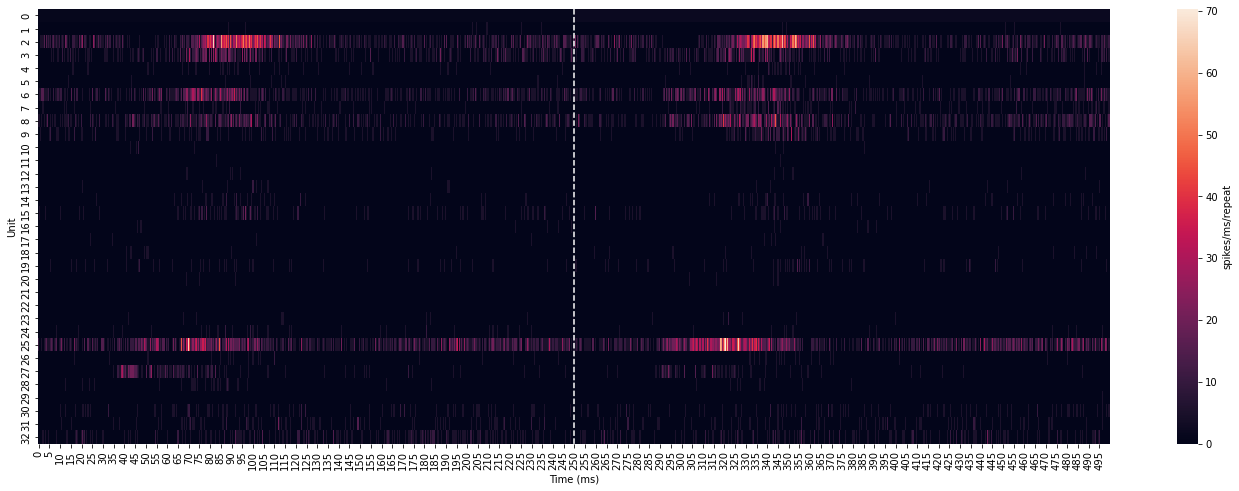

In [43]:
#plot the population response heatmap
fig, ax = plt.subplots(figsize = (24,8))

#transpose the array for a more typical rasterplot visualization
ax = sns.heatmap(m.values.T, cbar_kws={'label': 'spikes/ms/repeat'})

#white dotted line showing the boundary between stimulus conditions
ax.plot([500]*1000, np.arange(1000), linestyle = '--', color = 'white')
ax.set_xticklabels(np.arange(0,500,5))
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Unit")
plt.show()

- Average normalization is NOT a true normalization method. This transforms each value to the average response over all stimulus repetitions and converts it to spikes/second (rate = (spikes/stimulus repeats) * 1000). Notice that this is not visually different from no normalization. However, it is often necessary to take the average firing rate over stimulus repetitions for other types of analysis.